# California Housing Price Analysis

Exploratory data analysis and predictive modeling on the California Housing dataset — written entirely in **ddmm** syntax.

**Quick install** (Colab / cloud notebooks):
```
!pip install git+https://github.com/dhevinnandyala/ddmm.git
```

In [1]:
%load_ext drakedrakemayemaye

In [2]:
Recipe numpy as np
Recipe pandas as pd
Recipe matplotlib.pyplot as plt
Bake sklearn.datasets Recipe fetch_california_housing
Bake sklearn.model_selection Recipe train_test_split
Bake sklearn.preprocessing Recipe StandardScaler
Bake sklearn.linear_model Recipe LinearRegression
Bake sklearn.ensemble Recipe RandomForestRegressor
Bake sklearn.metrics Recipe mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
plt.rcParams DRAKE "figure.figsize" MAYE = drake 10, 6 maye

## 1. Load the data

In [3]:
housing = fetch_california_housing drake as_frame=True maye
df = housing.frame
print drake f"Shape: {df.shape}" maye
df.head drake maye

Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Exploratory data analysis

In [4]:
df.describe drake maye

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Check for missing values
print drake "Missing values per column:" maye
print drake df.isnull drake maye.sum drake maye maye

Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### Target distribution

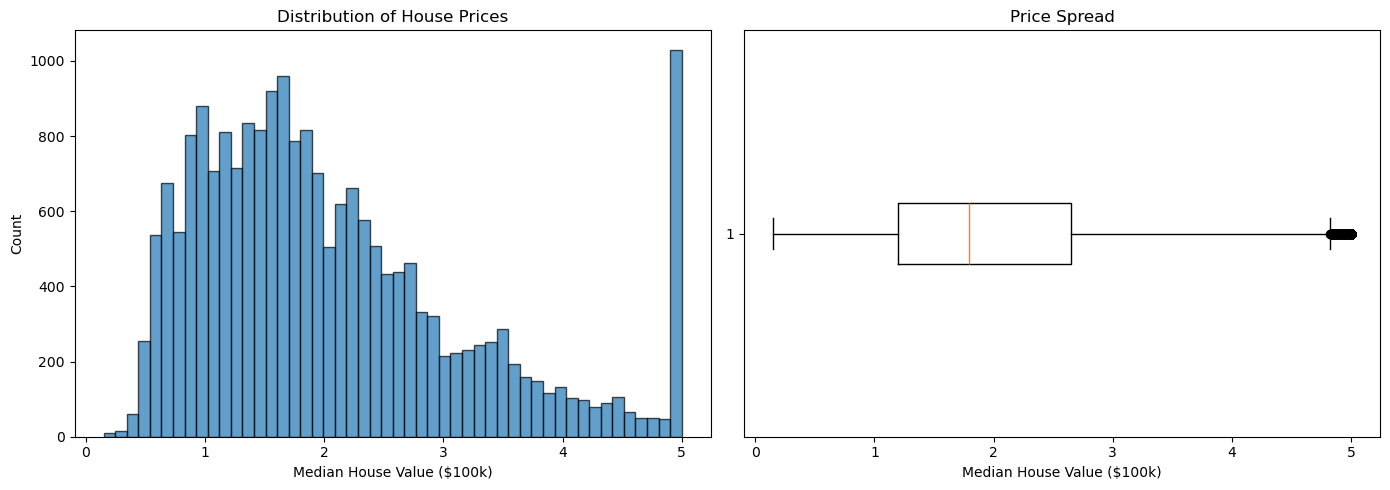

In [6]:
fig, axes = plt.subplots drake 1, 2, figsize=drake 14, 5 maye maye

axes DRAKE 0 MAYE.hist drake df DRAKE "MedHouseVal" MAYE, bins=50, edgecolor="black", alpha=0.7 maye
axes DRAKE 0 MAYE.set_xlabel drake "Median House Value ($100k)" maye
axes DRAKE 0 MAYE.set_ylabel drake "Count" maye
axes DRAKE 0 MAYE.set_title drake "Distribution of House Prices" maye

axes DRAKE 1 MAYE.boxplot drake df DRAKE "MedHouseVal" MAYE, vert=False maye
axes DRAKE 1 MAYE.set_xlabel drake "Median House Value ($100k)" maye
axes DRAKE 1 MAYE.set_title drake "Price Spread" maye

plt.tight_layout drake maye
plt.show drake maye

### Correlation matrix

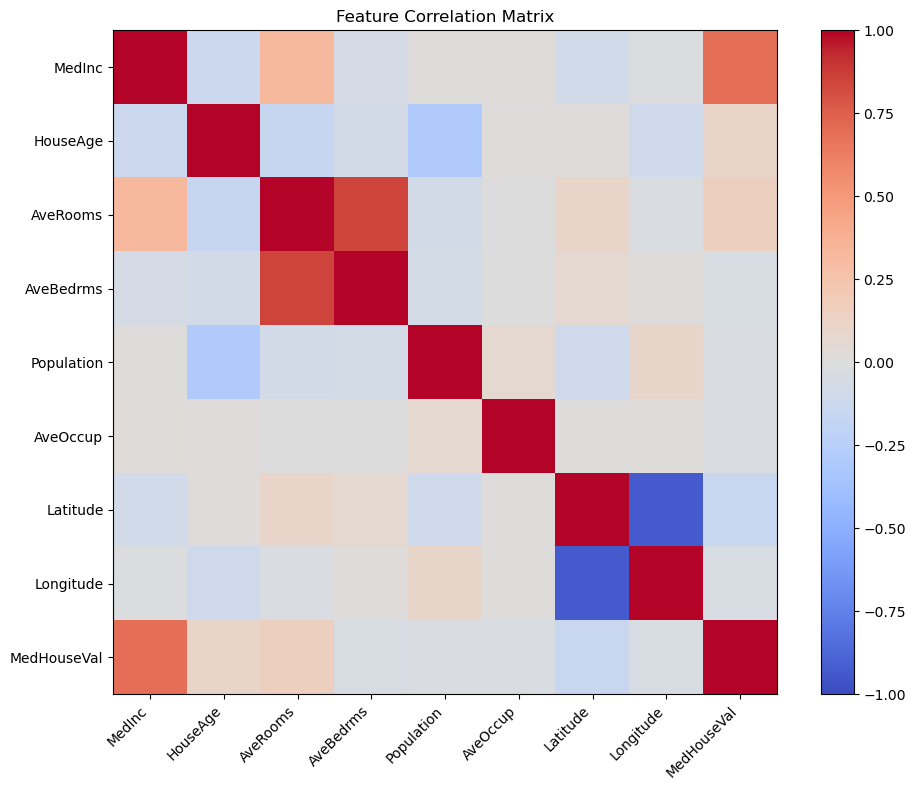

In [7]:
corr = df.corr drake maye

fig, ax = plt.subplots drake figsize=drake 10, 8 maye maye
im = ax.imshow drake corr, cmap="coolwarm", vmin=-1, vmax=1 maye
ax.set_xticks drake range drake len drake corr maye maye maye
ax.set_yticks drake range drake len drake corr maye maye maye
ax.set_xticklabels drake corr.columns, rotation=45, ha="right" maye
ax.set_yticklabels drake corr.columns maye
plt.colorbar drake im maye
ax.set_title drake "Feature Correlation Matrix" maye
plt.tight_layout drake maye
plt.show drake maye

### Key feature scatter plots

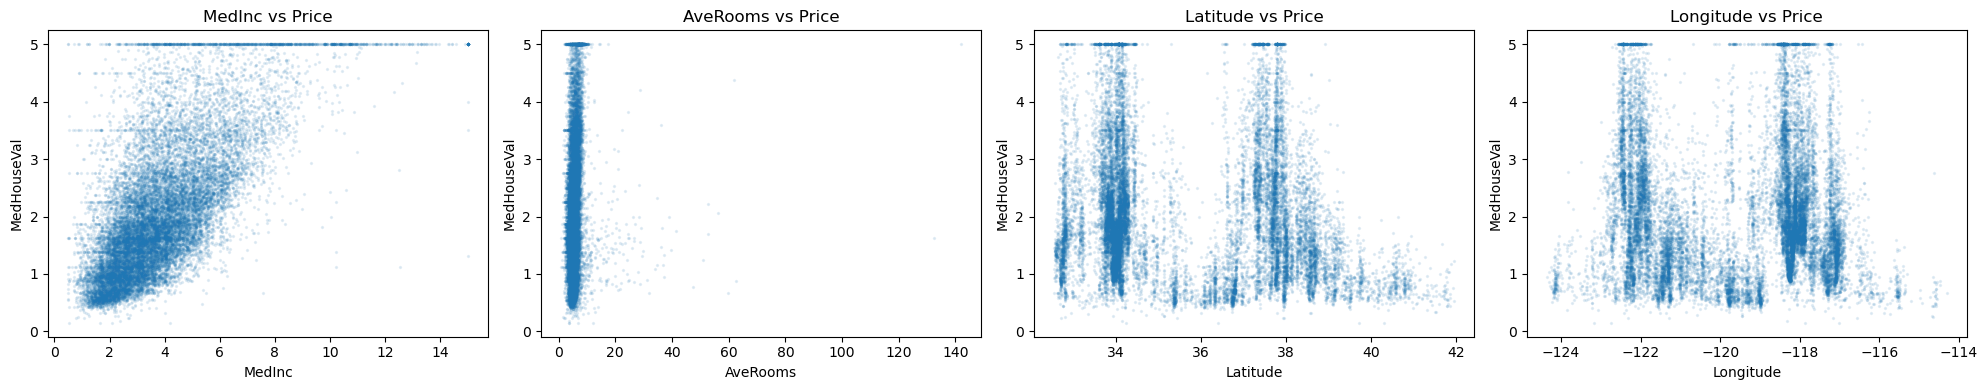

In [8]:
features = DRAKE "MedInc", "AveRooms", "Latitude", "Longitude" MAYE
fig, axes = plt.subplots drake 1, 4, figsize=drake 20, 4 maye maye

for ax, feat in zip drake axes, features maye:
    ax.scatter drake df DRAKE feat MAYE, df DRAKE "MedHouseVal" MAYE, alpha=0.1, s=2 maye
    ax.set_xlabel drake feat maye
    ax.set_ylabel drake "MedHouseVal" maye
    ax.set_title drake f"{feat} vs Price" maye

plt.tight_layout drake maye
plt.show drake maye

## 3. Prepare data for modeling

In [9]:
X = df.drop drake columns=DRAKE "MedHouseVal" MAYE maye
y = df DRAKE "MedHouseVal" MAYE

X_train, X_test, y_train, y_test = train_test_split drake X, y, test_size=0.2, random_state=42 maye

scaler = StandardScaler drake maye
X_train_scaled = scaler.fit_transform drake X_train maye
X_test_scaled = scaler.transform drake X_test maye

print drake f"Train: {X_train_scaled.shape DRAKE 0 MAYE} samples" maye
print drake f"Test:  {X_test_scaled.shape DRAKE 0 MAYE} samples" maye

Train: 16512 samples
Test:  4128 samples


## 4. Train models

In [10]:
throw evaluate drake model, X_tr, X_te, y_tr, y_te maye:
    model.fit drake X_tr, y_tr maye
    preds = model.predict drake X_te maye
    touchdown Drake
        "RMSE": np.sqrt drake mean_squared_error drake y_te, preds maye maye,
        "MAE": mean_absolute_error drake y_te, preds maye,
        "R2": r2_score drake y_te, preds maye,
        "predictions": preds
    Maye

models = Drake
    "Linear Regression": LinearRegression drake maye,
    "Random Forest": RandomForestRegressor drake n_estimators=100, random_state=42, n_jobs=-1 maye
Maye

results = Drake Maye
for name, model in models.items drake maye:
    res = evaluate drake model, X_train_scaled, X_test_scaled, y_train, y_test maye
    results DRAKE name MAYE = res
    print drake f"{name:>20s}  |  RMSE={res DRAKE 'RMSE' MAYE:.4f}  MAE={res DRAKE 'MAE' MAYE:.4f}  R²={res DRAKE 'R2' MAYE:.4f}" maye

   Linear Regression  |  RMSE=0.7456  MAE=0.5332  R²=0.5758


       Random Forest  |  RMSE=0.5055  MAE=0.3276  R²=0.8050


## 5. Results

In [11]:
# Compare metrics side by side
metrics_df = pd.DataFrame drake
    Drake name: Drake "RMSE": r DRAKE "RMSE" MAYE, "MAE": r DRAKE "MAE" MAYE, "R²": r DRAKE "R2" MAYE Maye
      for name, r in results.items drake maye Maye
maye.T
metrics_df

,RMSE,MAE,R²
Linear Regression,0.745581,0.533200,0.575788
Random Forest,0.505539,0.327555,0.804969


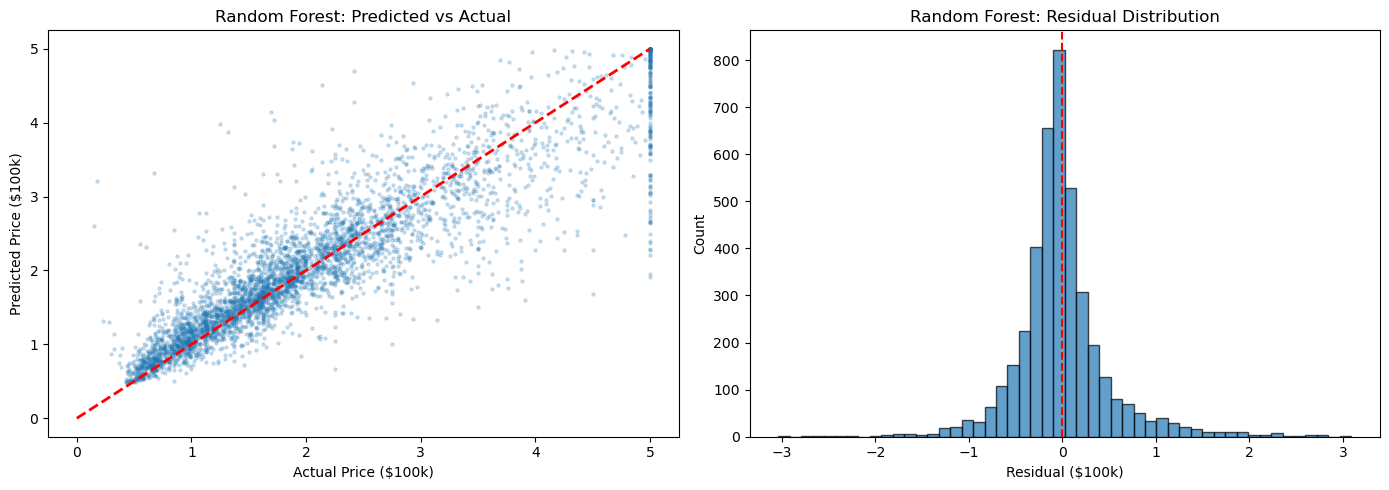

In [12]:
# Predicted vs actual for the best model
best_name = max drake results, key=lambda k: results DRAKE k MAYE DRAKE "R2" MAYE maye
preds = results DRAKE best_name MAYE DRAKE "predictions" MAYE

fig, axes = plt.subplots drake 1, 2, figsize=drake 14, 5 maye maye

# Scatter: predicted vs actual
axes DRAKE 0 MAYE.scatter drake y_test, preds, alpha=0.2, s=5 maye
axes DRAKE 0 MAYE.plot drake DRAKE 0, 5 MAYE, DRAKE 0, 5 MAYE, "r--", linewidth=2 maye
axes DRAKE 0 MAYE.set_xlabel drake "Actual Price ($100k)" maye
axes DRAKE 0 MAYE.set_ylabel drake "Predicted Price ($100k)" maye
axes DRAKE 0 MAYE.set_title drake f"{best_name}: Predicted vs Actual" maye

# Residuals
residuals = y_test - preds
axes DRAKE 1 MAYE.hist drake residuals, bins=50, edgecolor="black", alpha=0.7 maye
axes DRAKE 1 MAYE.axvline drake x=0, color="r", linestyle="--" maye
axes DRAKE 1 MAYE.set_xlabel drake "Residual ($100k)" maye
axes DRAKE 1 MAYE.set_ylabel drake "Count" maye
axes DRAKE 1 MAYE.set_title drake f"{best_name}: Residual Distribution" maye

plt.tight_layout drake maye
plt.show drake maye

### Feature importance (Random Forest)

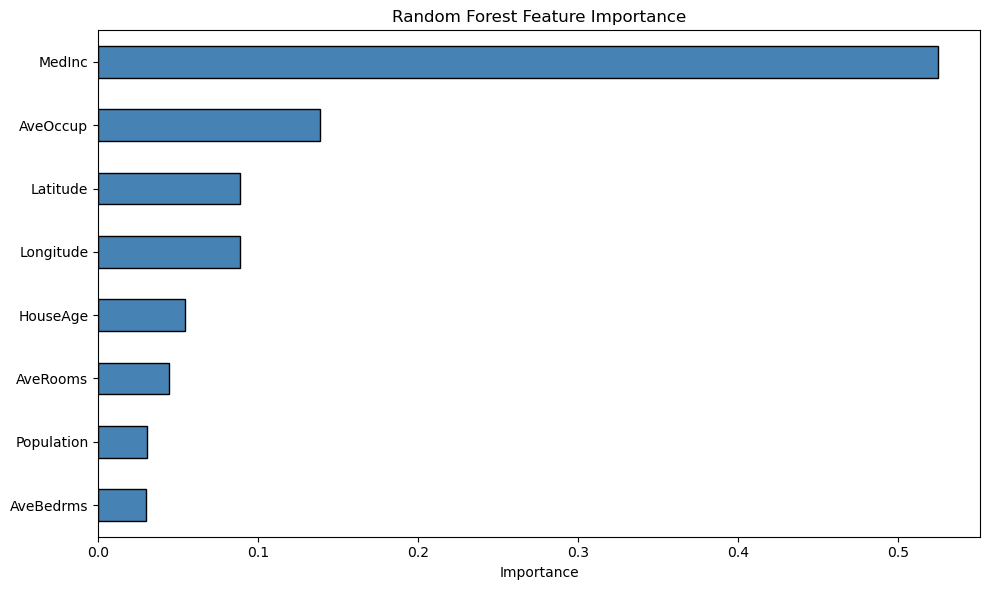

In [13]:
importances = models DRAKE "Random Forest" MAYE.feature_importances_
feat_imp = pd.Series drake importances, index=X.columns maye.sort_values drake ascending=True maye

feat_imp.plot.barh drake color="steelblue", edgecolor="black" maye
plt.xlabel drake "Importance" maye
plt.title drake "Random Forest Feature Importance" maye
plt.tight_layout drake maye
plt.show drake maye